<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/Transfer_learning_using_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ~MegaMachine~

**Copyright@~MEGAMACHINE~**;

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [ ]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

Python 3.8.15


### Get CPU and GPU info

In [ ]:
# get gpu name
!nvidia-smi -L

GPU 0: A100-SXM4-40GB (UUID: GPU-c5a1ce17-ebb6-291a-633a-da267d471ee2)


In [ ]:
# get gpu info
!nvidia-smi

Thu Dec  8 13:37:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    56W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# get cpu info
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              12
On-line CPU(s) list: 0-11
Thread(s) per core:  2
Core(s) per socket:  6
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            7
CPU MHz:             2200.160
BogoMIPS:            4400.32
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0-11
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid

# [Transfer learning and fine-tuning](https://www.tensorflow.org/tutorials/images/transfer_learning)

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

### load modules

In [ ]:
# make load numerical python
import numpy as np
# make load ploting modules
from matplotlib import pyplot as plt
import seaborn as sns
# load pandas
import pandas as pd
# load modules tensorflow and tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds

### load dataset

In [ ]:
# make disbale downloading progressive bar
tfds.disable_progress_bar()
# tfds.enable_progress_bar()

# Using TensorFlow Datasets
(train_ds,valid_ds,test_ds),metadata = tfds.load('tf_flowers',split=['train[:80%]','train[80%:90%]','train[90%:]'],
                                                 with_info=True,as_supervised=True)

# see type of training object
print('Type of training data:',type(train_ds))
# see type of validation object
print('Type of validation data:',type(valid_ds))
# see type of training object
print('Type of testing data:',type(test_ds))

# make print training data object
print('Training:',train_ds)
# make print validation data object
print('Validation:',valid_ds)
# make print data object
print('Testing:',test_ds)

# make print total samples in training data
print('Total training sample:',train_ds.cardinality().numpy())
# make print total samples in validation data
print('Total validation sample:',valid_ds.cardinality().numpy())
# make print total samples in testing data
print('Total testing sample:',test_ds.cardinality().numpy())

# set class names
class_names=['daisy','dandelion','roses','sunflowers','tulips']

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Type of training data: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
Type of validation data: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
Type of testing data: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
Training: <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Validation: <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Testing: <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Total training sample: 2936
Total validation sample: 367
Total testing sample: 367


### plot data

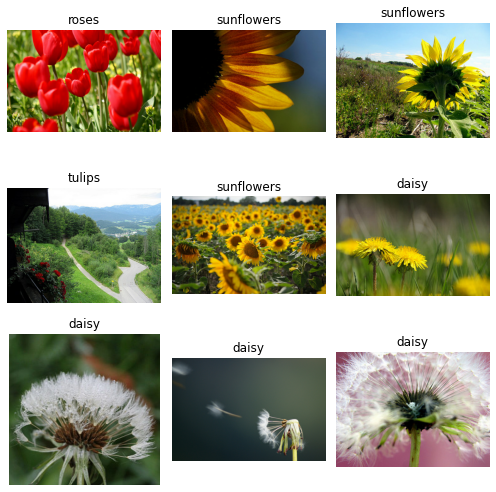

In [ ]:
# make plot for images
plt.figure(figsize=(7,7))

# make plot data training data
for index, (image,label) in enumerate(train_ds.take(9)):# make load first 9 images
   # make subplot
   plt.subplot(3,3,index+1)
   # make plot image
   plt.imshow(image)
   # make axis off
   plt.axis('off')
   # make add label
   plt.title(class_names[label.numpy()])
# make plot tight
plt.tight_layout()
# make plot show
plt.show()

### make apply preprocesing layer - [Image Data Augmentation](https://www.tensorflow.org/guide/keras/preprocessing_layers#image_data_augmentation)

In [ ]:
# get pixel range of images
np.max(image),np.min(image)

(255, 0)

In [ ]:
# make random rotate image
rotate=tf.keras.layers.RandomRotation(30,fill_mode='reflect',interpolation='bilinear',seed=None,fill_value=0.0)
# A preprocessing layer which randomly rotates images during training. This layer will apply random rotations to each image,
# filling empty space according to fill_mode. By default, random rotations are only applied during training.
# At inference time, the layer does nothing. If you need to apply random rotations at inference time, set training to True
# when calling the layer.

# make random flip image
flip=tf.keras.layers.RandomFlip(mode='horizontal_and_vertical',seed=None)
# A preprocessing layer which randomly flips images during training. This layer will flip the images horizontally and or
# vertically based on the mode attribute. During inference time, the output will be identical to input. Call the layer with
# training=True to flip the input.

# make random brightness
brighten=tf.keras.layers.RandomBrightness(0.1,value_range=(0,255),seed=None)
# A preprocessing layer which randomly adjusts brightness during training. This layer will randomly increase/reduce the
# brightness for the input RGB images. At inference time, the output will be identical to the input. Call the layer with
# training=True to adjust the brightness of the input.
# Note that different brightness adjustment factors will be apply to each the images in the batch.

# make random contrast
contrast=tf.keras.layers.RandomContrast(0.1,seed=None)
# A preprocessing layer which randomly adjusts contrast during training. This layer will randomly adjust the contrast of an
# image or images by a random factor. Contrast is adjusted independently for each channel of each image during training.
# For each channel, this layer computes the mean of the image pixels in the channel and then adjusts each component x of
# each pixel to (x - mean) * contrast_factor + mean.
# Input pixel values can be of any range (e.g. [0., 1.) or [0, 255]) and in integer or floating point dtype. By default,
# the layer will output floats. The output value will be clipped to the range [0, 255], the valid range of RGB colors.

# make apply zoom
zoom=tf.keras.layers.RandomZoom(0.05,width_factor=0.1,fill_mode='reflect',interpolation='bilinear',seed=None,fill_value=0.0)
# A preprocessing layer which randomly zooms images during training. This layer will randomly zoom in or out on each axis of
# an image independently, filling empty space according to fill_mode. Input pixel values can be of any range (e.g. [0., 1.)
# or [0, 255]) and of interger or floating point dtype. By default, the layer will output floats.

# make apply all preprocessing layers (only on training data)
for preprocessing in [rotate,flip,brighten,contrast,zoom]:
  # print info
  print(f'Applying - {preprocessing} on data ...')
  # make apply in training data
  train_ds=train_ds.map(lambda image,label: (preprocessing(image),label))
print('done ....')

# imput shape
height,width,channels=299,299,3

# make resize inputs
# A preprocessing layer which resizes images. This layer resizes an image input to a target height and width. The input
# should be a 4D (batched) or 3D (unbatched) tensor in "channels_last" format. Input pixel values can be of any range
# (e.g. [0., 1.) or [0, 255]) and of interger or floating point dtype. By default, the layer will output floats. This layer
# can be called on tf.RaggedTensor batches of input images of distinct sizes, and will resize the outputs to dense tensors
# of uniform size.
resize=tf.keras.layers.Resizing(height,width,interpolation='bilinear',crop_to_aspect_ratio=False,name=f'resizer_{height}x{width}_01')

# make resize all datasets
train_ds=train_ds.map(lambda image,label: (resize(image),label))
valid_ds=valid_ds.map(lambda image,label: (resize(image),label))
test_ds=test_ds.map(lambda image,label: (resize(image),label))

Applying - <keras.layers.preprocessing.image_preprocessing.RandomRotation object at 0x7f4474a2a3a0> on data ...
Applying - <keras.layers.preprocessing.image_preprocessing.RandomFlip object at 0x7f4474a2a310> on data ...
Applying - <keras.layers.preprocessing.image_preprocessing.RandomBrightness object at 0x7f4474a2a370> on data ...
Applying - <keras.layers.preprocessing.image_preprocessing.RandomContrast object at 0x7f4474a2a880> on data ...
Applying - <keras.layers.preprocessing.image_preprocessing.RandomZoom object at 0x7f4474a2aca0> on data ...
done ....


### plot data (augmented)

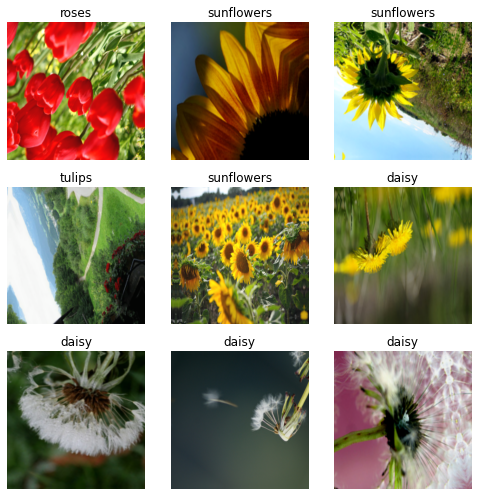

In [ ]:
# make plot for images
plt.figure(figsize=(7,7))

# make plot data training data
for index, (image,label) in enumerate(train_ds.take(9)):# make load first 9 images
   # make subplot
   plt.subplot(3,3,index+1)
   # make plot image
   plt.imshow(image.numpy().astype('uint8'))
   # make axis off
   plt.axis('off')
   # make add label
   plt.title(class_names[label.numpy()])
# make plot tight
plt.tight_layout()
# make plot show
plt.show()

### [Configure dataset for performance](https://www.tensorflow.org/tutorials/load_data/images#configure_dataset_for_performance)

In [ ]:
# make configure dataset for training data
train_ds=train_ds.cache().shuffle(buffer_size=1024).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# make configure dataset for training data
valid_ds=valid_ds.cache().batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# make configure dataset for training data
test_ds=test_ds.cache().batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# see AUTOTUNE
tf.data.AUTOTUNE

-1

### make model using transfer learning

Two ways to customize a pretrained model:

* Feature Extraction: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset. You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

* Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

[Create the base model from the pre-trained convnets](https://www.tensorflow.org/tutorials/images/transfer_learning#create_the_base_model_from_the_pre-trained_convnets) - [keras applications](https://keras.io/api/applications/)

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

Upon instantiation, the models will be built according to the image data format set in your Keras configuration file at ~/.keras/keras.json. For instance, if you have set image_data_format=channels_last, then any model loaded from this repository will get built according to the TensorFlow data format convention, "Height-Width-Depth".


In [ ]:
# load pretrain model base - Xception - https://keras.io/api/applications/xception/
# Reference (Xception: Deep Learning with Depthwise Separable Convolutions (CVPR 2017)): https://arxiv.org/abs/1610.02357
xception_base=tf.keras.applications.Xception(include_top=False,weights='imagenet',input_tensor=None,input_shape=(height,width,channels),
                                             pooling=None,classes=1000,classifier_activation='softmax')
# see model summary
xception_base.summary(line_length=140,positions=None,print_fn=None,expand_nested=False,show_trainable=True)

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
_______________________________________________________________________________________________________________________________________________________
 Layer (type)                                 Output Shape                   Param #         Connected to                                   Trainable  
 input_1 (InputLayer)                         [(None, 299, 299, 3)]          0               []                                             Y          
                                                                                                                                                       
 block1_conv1 (Conv2D)                        (None, 149, 149, 32)           864             ['input_1[0][0]']                              Y          
                                                                                                                                                       
 bloc

Using [Image preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers#image_preprocessing) to rescale and resize image  

In [ ]:
# make model weights freeze
#xception_base.trainable(False)

# make input layer
inputs=tf.keras.layers.Input(shape=(height,width,channels),batch_size=None,name='inputs_00',dtype=None,sparse=None,tensor=None,
                             ragged=None,type_spec=None)
# make rescle inputs (from 0,255 to -1,1)
# A preprocessing layer which rescales input values to a new range. This layer rescales every value of an input (often an image)
# by multiplying by scale and adding offset.
#rescale=tf.keras.layers.Rescaling(2./255.,offset=-1.0,name='rescaling_11_02')(inputs)
modelx=tf.keras.applications.xception.preprocess_input(inputs)
# passed resized and scaled outputs to base model
modelx=xception_base(modelx)
# add global maximum pooling layer
modelx=tf.keras.layers.GlobalAveragePooling2D(name='global_average_04')(modelx)
# add dense layer - 1
modelx=tf.keras.layers.Dense(1024,activation='relu',name='dense_1024_05')(modelx)
# add dropout layer - 1
modelx=tf.keras.layers.Dropout(0.3,name='dropout_30_06')(modelx)
# add dense layer - 2
modelx=tf.keras.layers.Dense(1024,activation='relu',name='dense_1024_07')(modelx)
# add dropout layer - 2
modelx=tf.keras.layers.Dropout(0.3,name='dropout_30_08')(modelx)
# add output layer
outputs=tf.keras.layers.Dense(len(class_names),activation='softmax',name='outputs')(modelx)


# make functional model
model=tf.keras.Model(inputs=[inputs],outputs=[outputs],name='flower_classifier')
# see model summary
model.summary(line_length=140,positions=None,print_fn=None,expand_nested=False,show_trainable=True)

Model: "flower_classifier"
_______________________________________________________________________________________________________________________________________________________
 Layer (type)                                                  Output Shape                                            Param #              Trainable  
 inputs_00 (InputLayer)                                        [(None, 299, 299, 3)]                                   0                    Y          
                                                                                                                                                       
 tf.math.truediv (TFOpLambda)                                  (None, 299, 299, 3)                                     0                    Y          
                                                                                                                                                       
 tf.math.subtract (TFOpLambda)                               

In [ ]:
# make model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

# metric to monitored
monitor='val_accuracy'
# patience (epoches to wait before stooping)
wait4epoches=5
# restore best weights
restore_weights=True
# set verbosity
verbosity=1

# make early stopping object
early_stopping=tf.keras.callbacks.EarlyStopping(monitor=monitor,min_delta=0,patience=wait4epoches,verbose=verbosity,mode='auto',
                                                baseline=None,restore_best_weights=restore_weights)

# make model train
history=model.fit(train_ds,batch_size=None,epochs=50,verbose=verbosity,callbacks=[early_stopping],validation_split=0.0,
                  validation_data=valid_ds,shuffle=True)

Epoch 1/50
92/92 [==============================] - 127s 981ms/step - loss: 0.6449 - accuracy: 0.7851 - val_loss: 1.7287 - val_accuracy: 0.7193
Epoch 2/50
92/92 [==============================] - 51s 550ms/step - loss: 0.3868 - accuracy: 0.8740 - val_loss: 8.1449 - val_accuracy: 0.6458
Epoch 3/50
92/92 [==============================] - 50s 543ms/step - loss: 0.3607 - accuracy: 0.8975 - val_loss: 1.9883 - val_accuracy: 0.7057
Epoch 4/50
92/92 [==============================] - 52s 568ms/step - loss: 0.3113 - accuracy: 0.8965 - val_loss: 2.8103 - val_accuracy: 0.7411
Epoch 5/50
92/92 [==============================] - 51s 557ms/step - loss: 0.2771 - accuracy: 0.9152 - val_loss: 0.6758 - val_accuracy: 0.8283
Epoch 6/50
92/92 [==============================] - 52s 567ms/step - loss: 0.1873 - accuracy: 0.9452 - val_loss: 1.4740 - val_accuracy: 0.7084
Epoch 7/50
92/92 [==============================] - 52s 563ms/step - loss: 0.1949 - accuracy: 0.9336 - val_loss: 0.6264 - val_accuracy: 0.825

### see model history

In [ ]:
# convert model history to pandas array (see first five epochs)
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.644903,0.785082,1.728729,0.719346
1,0.386826,0.873978,8.144886,0.645777
2,0.360736,0.897480,1.988277,0.705722
3,0.311282,0.896458,2.810334,0.741144
4,0.277088,0.915191,0.675811,0.828338


In [ ]:
# convert model history to pandas array (see last five epochs)
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
11,0.077933,0.976158,0.457182,0.901907
12,0.091556,0.977861,0.475723,0.861035
13,0.096748,0.969346,0.531671,0.863760
14,0.059938,0.984332,0.573623,0.904632
15,0.069905,0.980586,0.687910,0.877384


### plot model history

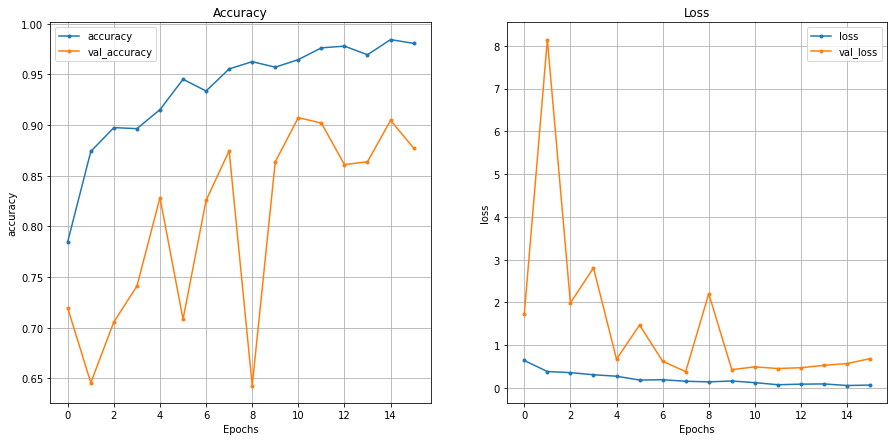

In [ ]:
# make figure
plt.figure(figsize=(15,7))

# make subplot
plt.subplot(1,2,1)
# make plot accuracy (training accuracy)
pd.DataFrame(history.history)['accuracy'].plot(marker='.')
# make plot accuracy (validation accuracy)
pd.DataFrame(history.history)['val_accuracy'].plot(marker='.')
# add axis and title
plt.title('Accuracy'),plt.xlabel('Epochs'),plt.ylabel('accuracy')
# add grid and legend
plt.grid(),plt.legend()

# make figure (plot loss)
#plt.figure(figsize=(7,7))
# make subplot
plt.subplot(1,2,2)
# make plot accuracy (training loss)
pd.DataFrame(history.history)['loss'].plot(marker='.')
# make plot accuracy (validation loss)
pd.DataFrame(history.history)['val_loss'].plot(marker='.')
# add axis and title
plt.title('Loss'),plt.xlabel('Epochs'),plt.ylabel('loss')
# add grid and legend
plt.grid(),plt.legend()
# make plot show
#plt.show()

# make plot show
plt.show()

### evaluate model

Evaluate accuracy: Next, compare how the model performs on the test dataset.

In [ ]:
# make model evaluate
loss,accuracy=model.evaluate(test_ds,batch_size=None,verbose='auto')
# see results
print(f'Model testing accuracy: {accuracy}; and loss: {loss}')

12/12 [==============================] - 1s 43ms/step - loss: 0.2848 - accuracy: 0.9210
Model testing accuracy: 0.9209809303283691; and loss: 0.2847878634929657


### make predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.




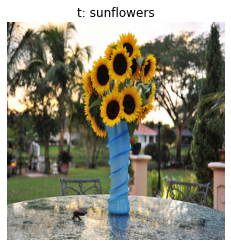

In [ ]:
# get a batch from testing data (32 images and 32 labels)
Xtest,ytest=next(test_ds.as_numpy_iterator())

# make prediction on random image
random_index=np.random.choice(range(Xtest.shape[0]))
# make plot image of random index
plt.imshow(Xtest[random_index].astype('uint8'))# make image plot
plt.title('t: '+class_names[ytest[random_index]])# add title to plot
plt.axis('off')# make axis off
plt.show()# make image show

In [ ]:
# make prediction using model (input image)
probabilities=model.predict(Xtest[random_index:random_index+1])
# or #probabilities=model(Xtest[[random_index]])
# see probabilities
print('Model prediction prbabilities:',probabilities)
print('I think this is a image of',class_names[np.argmax(probabilities)])

1/1 [==============================] - 1s 835ms/step
Model prediction prbabilities: [[2.5208953e-11 5.3670268e-13 8.2000852e-16 1.0000000e+00 1.1673208e-18]]
I think this is a image of sunflowers


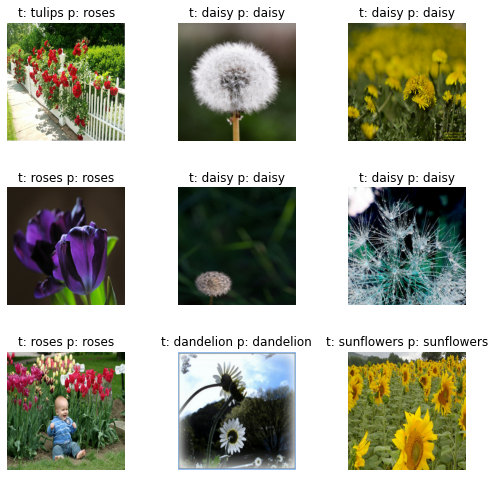

In [ ]:
# make figure (set figure size)
plt.figure(figsize=(7,7))
# make plot data (9-images)
for index in range(9):
  # make subplots
  plt.subplot(3,3,index+1)
  # make plot image
  plt.imshow(Xtest[index].astype('uint8'),cmap='gray')
  # make axis off
  plt.axis('off')
  # make image predicted
  #prediction=np.argmax(model.predict(Xtest[[index]],verbose=0))
  prediction=np.argmax(model(Xtest[index:index+1]))
  # add title
  plt.title('t: '+str(class_names[ytest[index]])+' p: '+str(class_names[prediction]))
# make plot nearer and nearer
plt.tight_layout()
# make show
plt.show()

### make prediction using global image

In [ ]:
# download image
!wget -O daisy.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg/800px-Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg

--2022-12-08 14:04:58--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg/800px-Daisy_G%C3%A4nsebl%C3%BCmchen_Bellis_perennis_01.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55301 (54K) [image/jpeg]
Saving to: ‘daisy.jpg’

daisy.jpg           100%[===================>]  54.00K  --.-KB/s    in 0.002s  

2022-12-08 14:04:59 (27.7 MB/s) - ‘daisy.jpg’ saved [55301/55301]



probabilities: tf.Tensor([[0.04108698 0.06006719 0.5583567  0.28515032 0.05533881]], shape=(1, 5), dtype=float32)


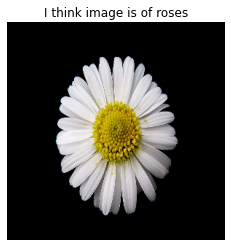

In [ ]:
# make load module for reading image
#from matplotlib import image as imread
import cv2 as vision

# load image
image=vision.cvtColor(vision.imread('daisy.jpg',vision.IMREAD_COLOR),vision.COLOR_BGR2RGB)
# resize image
image=vision.resize(image,(height,width))
# resscale image
image_scaled=(image/image.max()).astype(np.float32)
# make prediction
probabilities=model(np.expand_dims(image_scaled,axis=0))
# see probabilities
print('probabilities:',probabilities)
# make plot image --------------------------------------------------------------
plt.imshow(image_scaled,cmap='gray')
plt.title('I think image is of '+str(class_names[np.argmax(probabilities)]))
plt.axis('off')
plt.show()

# References

* Source: [Image classification](https://www.tensorflow.org/tutorials/images/classification)
* Data source: https://www.tensorflow.org/datasets/catalog/tf_flowers
* Convolutional Neural Network (CNN) : https://www.tensorflow.org/tutorials/images/cnn
* As this model is overfitting, so for solution for overfitting look - https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
* The Sequential model - https://www.tensorflow.org/guide/keras/sequential_model
* The Functional API - https://www.tensorflow.org/guide/keras/functional
* Pyimagesearch (Unofficial): [3 ways to create a Keras model with TensorFlow 2.0 (Sequential, Functional, and Model Subclassing)](https://pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)